In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-11-30 / Aki Taanila


## Countplot - lukumäärä- ja prosenttiyhteenvedot

Seabornin **countplot** sopii kategorisille muuttujille lukumäärä- ja prosenttiyhteenvetojen havainnollistamiseen. Lisätietoa https://seaborn.pydata.org/generated/seaborn.countplot.html.

### Tuonnit ja alkuvalmistelut

- Grafiikan tyylimäärittelyssä voit käyttää **'whitegrid'** sijasta **'white'**, **'dark'**, **'darkgrid'** tai **'ticks'**. Voit myös jättää tyylimäärittelyn tekemättä.
- **PercentFormatter** auttaa muotoilemaan akselin prosenttiasteikon.
- **MultipleLocator** auttaa muuttamaan akselin asteikon jaotusta.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib.ticker import PercentFormatter, MultipleLocator
ticks = PercentFormatter(xmax=100, decimals=0, symbol=' %')

### Datan avaaminen

Seaborn-paketin esimerkkidata **tips** sisältää tietoja ravintolassa asioineista seurueista.

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Yksinkertainen pylväskaavio

Kaavion otsikko ja akseleiden otsikot ovat tärkeitä kaavion tulkinnassa. Kannattaa laatia kaavio ensin ilman akseleiden otsikoiden määrittelyä, koska joissain tapauksissa oletusotsikot ovat tilanteeseen riittävät. Tässä esimerkissä akselien englanninkieliset oletusotsikot vaihdetaan suomenkielisiksi.

**plt** viittaa **matplotlib.pyplot**-pakettiin, joka sisältää oikotien moniin muotoiluihin. Lisätietoa https://matplotlib.org/stable/api/pyplot_summary.html.

Text(0, 0.5, 'Seurueiden lukumäärä')

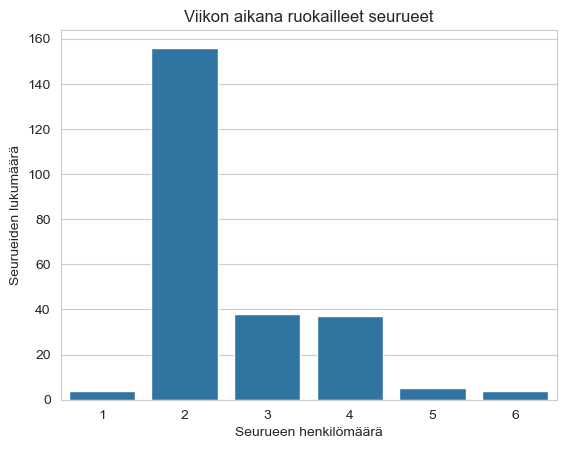

In [4]:
sns.countplot(tips, x='size')
plt.title('Viikon aikana ruokailleet seurueet')
plt.xlabel('Seurueen henkilömäärä')
plt.ylabel('Seurueiden lukumäärä')

### Lisää muotoiluja

Kaikkea ei voi tehdä **plt**:n kautta, vaan vaativammassa muotoilussa viitataan suoraan kaavioon (**Axes**-luokan olio) ja sen ominaisuuksiin. Tätä varten kaavio sijoitetaan muuttujan arvoksi. Seuraavassa solussa muuttujan nimeksi on annettu **ax**. Lisätietoa **Axes**-luokasta https://matplotlib.org/stable/api/axes_api.html.

- Pystyasteikolla käytetään lukumäärien sijasta prosentteja (`stat='percent'`).
- Prosenttiasteikko muotoillaan käyttäen aiemmin määriteltyä **ticks**-muotoilua.
- Prosenttiasteikon jaotuksen väliksi asetetaan 10.
- Pystyakseli skaalataan välille 0 - 100 (`plt.ylim(0, 100)`).
- Pylväiden yläpuolelle lisätään pylvään korkeutta kuvaava prosenttiluku. Prosenttiluku muotoillaan (`fmt='{:.1f} %'`) yhteen desimaaliin ja varustetaan välilyönnin jälkeisellä prosenttimerkillä. Luvun ja pylvään yläreunan väliin jätetään hieman väliä (`padding=2`).

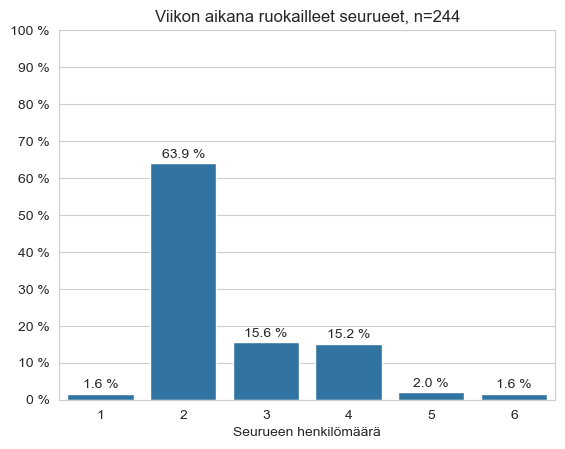

In [5]:
ax = sns.countplot(tips, x='size', stat='percent')
plt.title(f'Viikon aikana ruokailleet seurueet, n={tips['size'].count()}')
plt.xlabel('Seurueen henkilömäärä')
plt.ylabel('')

ax.yaxis.set_major_formatter(ticks)
ax.yaxis.set_major_locator(MultipleLocator(10))
plt.ylim(0, 100)

for container in ax.containers:
    ax.bar_label(container, fmt='{:.1f} %', padding=2)

### Vierekkäiset pylväät

Käyttämällä **x**:n sijasta **y**-parametria saadaan vaakapylväskaavio. Käyttämällä **hue**-parametria voidaan lisätä kaavioon ryhmittelevä kategorinen muuttuja. Seuraavassa kaaviossa on käytetty **hue**-parametrin arvona **time**-muuttujaa (lounas vai illallinen). Kaaviossa on käytetty aiemmin selitettyjen lisäksi seuraavia muotoiluja:

- Pylväiden nimet (**yticks**) korvataan suomenkielisillä viikonpäivillä. Ennen korvaamista on tärkeää katsoa kaaviosta, mitä viikonpäivää mikäkin pylväs edustaa. **plt.yticks**-funktion ensimmäinen parametri on viittaus korvattavien nimien numeroihin [0, 1, 2, 3].  Toisena parametrina annetaan korvattavat arvot.
- Selitteen (**legend**) nimet korvataan suomenkielisillä vastineilla.

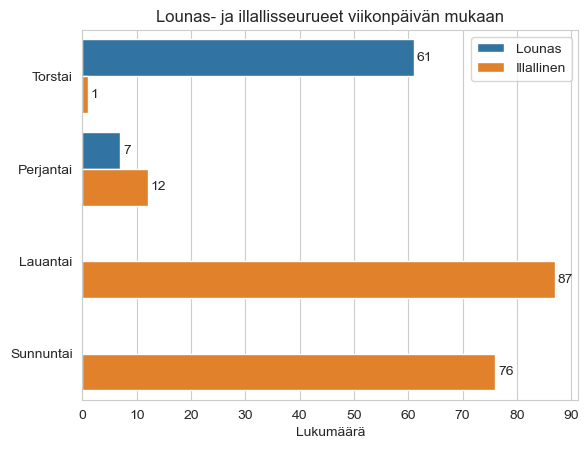

In [6]:
ax = sns.countplot(tips, y='day', hue='time')
plt.title('Lounas- ja illallisseurueet viikonpäivän mukaan')
plt.xlabel('Lukumäärä')
plt.ylabel('')
 
plt.yticks([0, 1, 2, 3], ['Torstai', 'Perjantai', 'Lauantai', 'Sunnuntai'])
ax.legend(['Lounas', 'Illallinen'])
ax.xaxis.set_major_locator(MultipleLocator(10))

for container in ax.containers:
    ax.bar_label(container, fmt='{:.0f}', padding=2)

Seuraavana vielä kertauksen vuoksi toinen vastaavanlainen esimerkki.

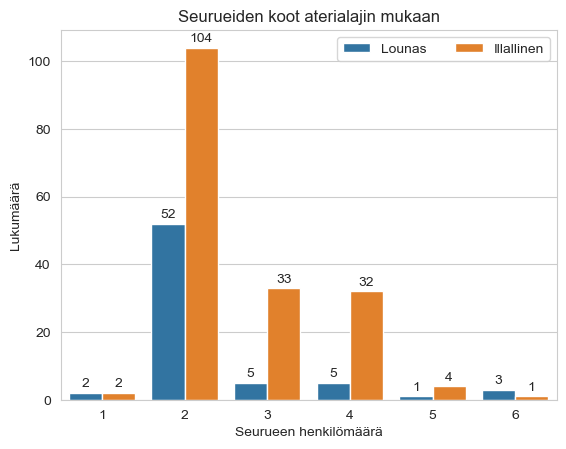

In [7]:
ax = sns.countplot(tips, x='size', hue='time')
plt.title('Seurueiden koot aterialajin mukaan')
plt.xlabel('Seurueen henkilömäärä')
plt.ylabel('Lukumäärä')
ax.legend(['Lounas', 'Illallinen'], ncol=2)
for container in ax.containers:
    ax.bar_label(container, fmt='{:.0f}', padding=2)

### Usean kaavion yhdistelmä

Vierekkäisten pylväiden kaavioihin voidaan ottaa lukumäärien sijasta prosenttiluvut. Tällaiset kaaviot ovat tulkinnan kannalta ongelmallisia, koska katsojan on vaikea hahmottaa, mistä prosentit on laskettu? Edellisen kaavion kohdalla prosentit voisi laskea seurueiden kokonaismäärästä tai lounasseurueiden ja illallisseurueiden kokonaismääristä. Parametrin **stat** arvolla **percent** laskettaisiin prosentit seurueiden kokonaismäärästä.

Tulkinnan kannalta on selkeämpä käyttää kahden kaavion yhtdistelmää kuten seuraavassa esimerkissä.

Usean kaavion yhdistelmä voidaan luoda **plt.subplots**-funktiolla, joka palauttaa kuvion (**figure**) ja kuvion sisään sijoitettujen kaavioiden listan. Seuraavassa nämä on sijoitettu muuttujien **fig** ja **axs** arvoiksi. Parametrin `ncols=2` mukaisesti luodaan kuvio, joka sisältää kaksi kaaviota vierekkäin. Kaavioilla on yhteinen y-akseli (`sharey=True`) ja kuvion koko on **12.8 x 4.8**. Oletuskuvion koko olisi ollut **6.4 x 4.8**. Koko kuvion otsikko määritellään **plt.suptitle**-funktiolla.

Kuvion sisällä sijaitseviin kaavioihin voi viitata **axs[0]** ja **axs[1]**. Kaaviot luodaan normaaliin tapaan, mutta ylimääräisenä parametrina **ax** annetaan viittaus kaavion sijaintiin kuvion sisällä, esimerkiksi `ax=axs[0]`.

Prosentteja käytettäessä on tärkeää ilmoittaa n-arvot eli arvot, joista prosentit on laskettu. Seuraavassa esimerkissä ne on lisätty kaavioiden otsikoihin.

Lisätietoa usean kaavion yhdistelmistä https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html.

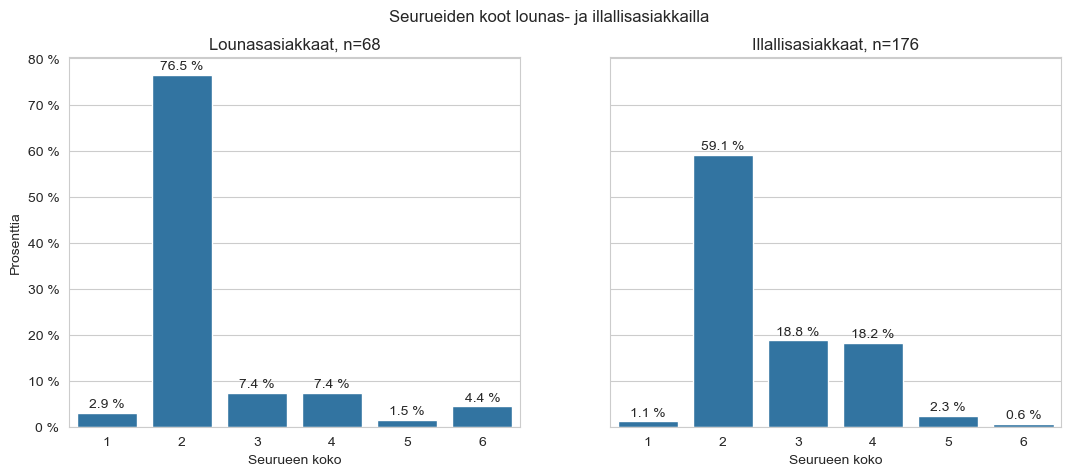

In [8]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(12.8, 4.8))

plt.suptitle('Seurueiden koot lounas- ja illallisasiakkailla')

n_arvot = tips.groupby('time', observed=True)['size'].count()

# Lounasasiakkaiden kaavio
sns.countplot(tips[tips['time']=='Lunch'], x='size', stat='percent', ax=axs[0])
axs[0].set_title(f'Lounasasiakkaat, n={n_arvot['Lunch']}')
axs[0].set_ylabel('Prosenttia')
axs[0].set_xlabel('Seurueen koko')
axs[0].yaxis.set_major_formatter(ticks)
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='{:.1f} %', padding=2)

# Illallisasiakkaiden kaavio
sns.countplot(tips[tips['time']=='Dinner'], x='size', stat='percent', ax=axs[1])
axs[1].set_title(f'Illallisasiakkaat, n={n_arvot['Dinner']}')
axs[1].set_xlabel('Seurueen koko')
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='{:.1f} %', padding=2)

### Muuta huomioitavaa

#### Fontit

Tekstiä lisäävät funktiot (**plt.title**, **plt.xlabel**, **plt.xticks**, **bar_label** jne.) tunnistavat tekstiin liittyviä parametreja https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text kuten esimerkiksi **fontsize** ja **fontstyle**.

Jos haluat tehdä kerralla koko muistiota koskevia fonttimuutoksia, niin katso [matplotlib7.ipynb](https://github.com/taanila/kaaviot/blob/master/matplotlib7.ipynb).

#### Värit

Kaavion väripaletin voit vaihtaa antamalla kaavionluonti-komennossa arvon **palette**-parametrille. Esimerkiksi `palette='Set1'` muuttaa paletiksi **Set1** tai `palette=['green', 'red']` muuntaa kahdenvärisiä pylväitä sisältävän kaavion pylväät vihreiksi ja punaisiksi.

Jos haluat käyttää kaikissa muistion kaavioissa samaa vaihtoehtoista palettia, niin käytä **sns.set_palette**-funktiota, esimerkiksi `sns.set_palette('Set1')`.

- Värejä https://matplotlib.org/stable/gallery/color/named_colors.html.
- Paletteja https://matplotlib.org/stable/gallery/color/colormap_reference.html.

#### Kuvion koko

Kuvion (**Figure**) oletuskoko on **6.4 x 4.8**. Jos haluat vaihtaa koon, niin luo kuvio ennen kaavion luontia, esimerkiksi `plt.figure(figsize=(4, 3))`. Usean kaavion yhdistelmän koon voit vaihtaa **subplots** funktion **figsize**-parametrilla.

### Lisätietoa

https://tilastoapu.wordpress.com/python